In [ ]:
import cv2
from matplotlib import pyplot as plt

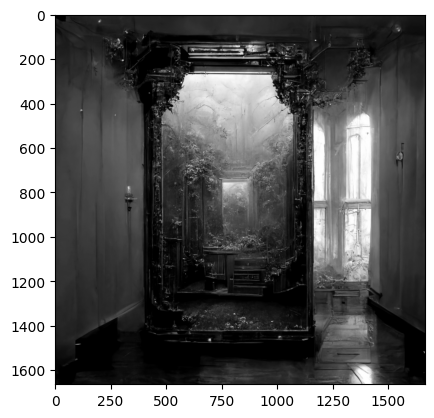

In [ ]:
image = cv2.imread("/content/drive/MyDrive/AI generated photos/MidJourney/e01f359b-76d8-4fe1-88e7-3507fe89f40d_progress_image_83.webp")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap="gray")
plt.show()

In [ ]:
image.shape

(1664, 1664)

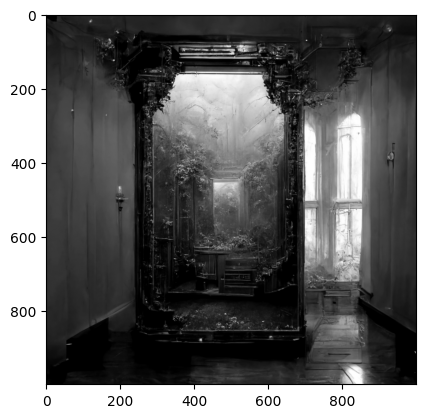

In [ ]:
resized_image = cv2.resize(image, (1000, 1000))
plt.imshow(resized_image, cmap="gray")
plt.show()

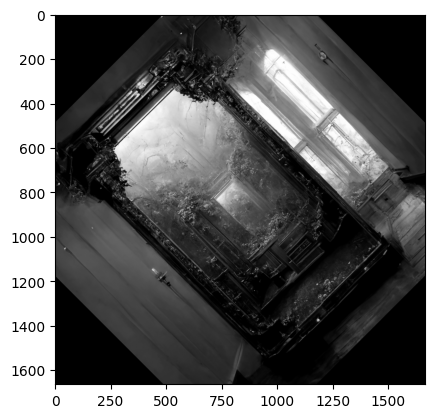

In [ ]:
(h, w) = image.shape[:2]
center = (w / 2, h / 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))

plt.imshow(rotated, cmap="gray")
plt.show()

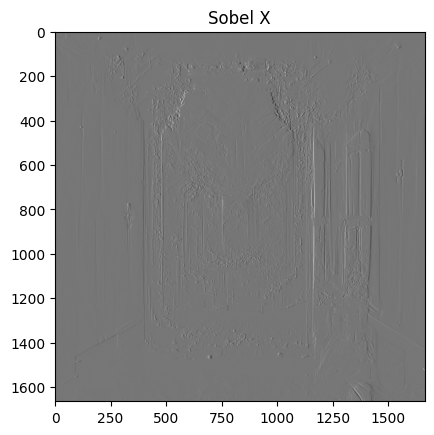

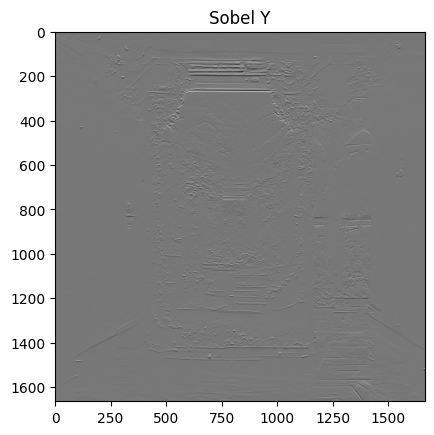

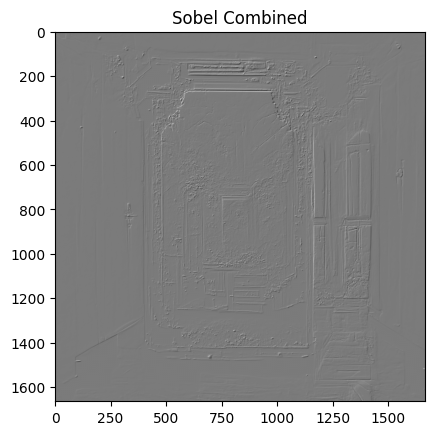

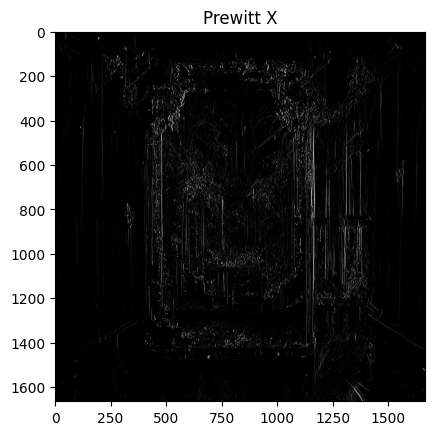

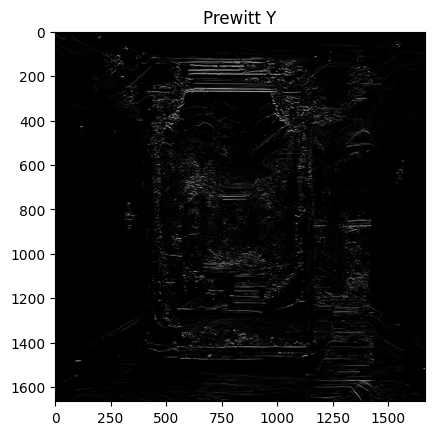

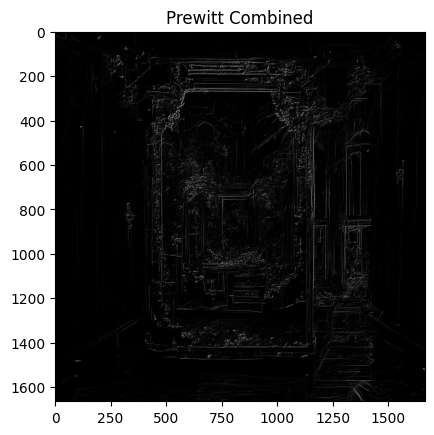

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Sobel Operator
# Detect edges using the Sobel operator in the X and Y directions
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # Sobel filter for X direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # Sobel filter for Y direction

# Combine Sobel X and Y images
sobel_combined = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

# 2. Prewitt Operator
# Define Prewitt kernels for edge detection
kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])  # Prewitt filter for X direction
kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])  # Prewitt filter for Y direction

# Apply Prewitt filters to the image
prewitt_x_filtered_image = cv2.filter2D(image, -1, kernel_x)
prewitt_y_filtered_image = cv2.filter2D(image, -1, kernel_y)

# Combine Prewitt X and Y images
prewitt_combined = cv2.addWeighted(prewitt_x_filtered_image, 0.5, prewitt_y_filtered_image, 0.5, 0)

# 3. Visualization
# Plot Sobel results
plt.figure()
plt.title("Sobel X")
plt.imshow(sobel_x, cmap="gray")

plt.figure()
plt.title("Sobel Y")
plt.imshow(sobel_y, cmap="gray")

plt.figure()
plt.title("Sobel Combined")
plt.imshow(sobel_combined, cmap="gray")

# Plot Prewitt results
plt.figure()
plt.title("Prewitt X")
plt.imshow(prewitt_x_filtered_image, cmap="gray")

plt.figure()
plt.title("Prewitt Y")
plt.imshow(prewitt_y_filtered_image, cmap="gray")

plt.figure()
plt.title("Prewitt Combined")
plt.imshow(prewitt_combined, cmap="gray")

# Show all plots
plt.show()


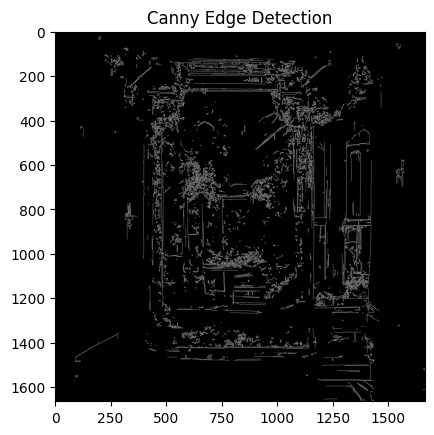

In [ ]:
# 3. Canny Edge Detection
# This method detects edges using multi-stage processing, which includes gradient calculation,
# non-maximum suppression, double thresholding, and edge tracking. It is more advanced compared
# to Sobel and Prewitt, providing cleaner edges by suppressing noise and defining strong edges.

# Perform Canny Edge Detection
edges_canny = cv2.Canny(image, 100, 200)

# Visualize the Canny Edge Detection Result
plt.figure()
plt.title("Canny Edge Detection")
plt.imshow(edges_canny, cmap="gray")
plt.show()

# Comparison:
# - Sobel and Prewitt primarily compute the gradients in X and Y directions and are suitable for basic edge detection.
# - Canny is more advanced, providing better noise suppression and more precise edge localization.


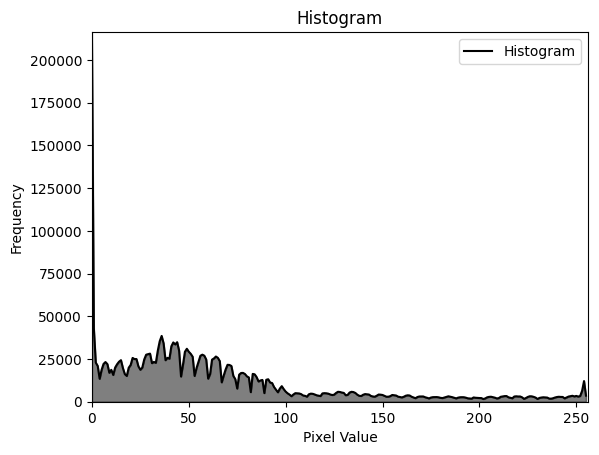

In [ ]:
def plot_hist(hist):
    # Create a new figure
    plt.figure()

    # Plot the histogram as a line
    plt.plot(hist, color="black", label="Histogram")

    # Fill the area under the curve
    plt.fill_between(range(256), hist.ravel(), color="black", alpha=0.5)

    # Set x and y limits
    plt.xlim([0, 256])  # Pixel intensity range
    plt.ylim([0, max(hist)])  # Frequency range based on histogram

    # Add title and labels
    plt.title("Histogram")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")

    # Show the plot
    plt.legend()
    plt.show()

# Calculate the histogram of the image
# Replace 'image' with the variable holding your grayscale image
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Call the function to plot the histogram
plot_hist(hist)

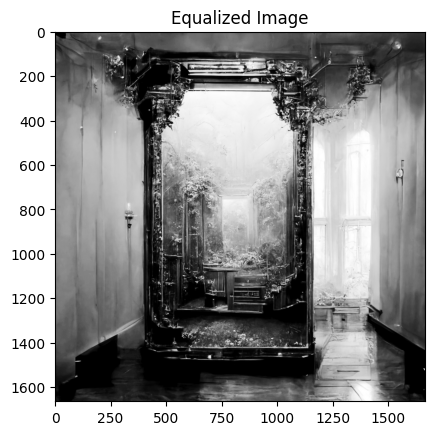

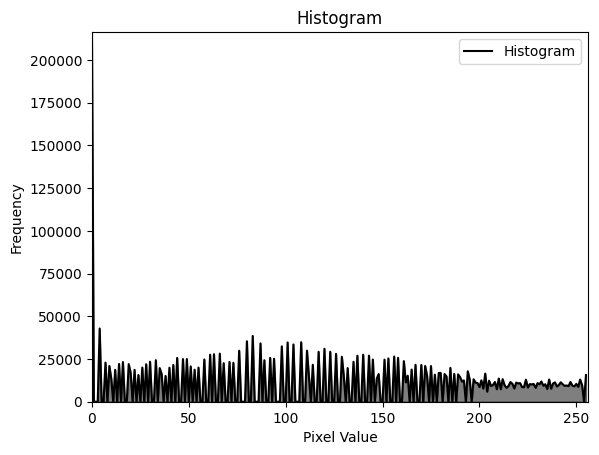

In [ ]:
# 5. Histogram Equalization
# This step improves the contrast of the image by spreading out the pixel intensity distribution.
# It enhances details in darker and brighter regions of the image.

# Perform histogram equalization
image_to_eq = cv2.equalizeHist(image)

# Display the equalized image
plt.figure()
plt.title("Equalized Image")
plt.imshow(image_to_eq, cmap="gray")
plt.show()

# Calculate the histogram of the equalized image
hist_eq = cv2.calcHist([image_to_eq], [0], None, [256], [0, 256])

# Plot the histogram of the equalized image
plot_hist(hist_eq)


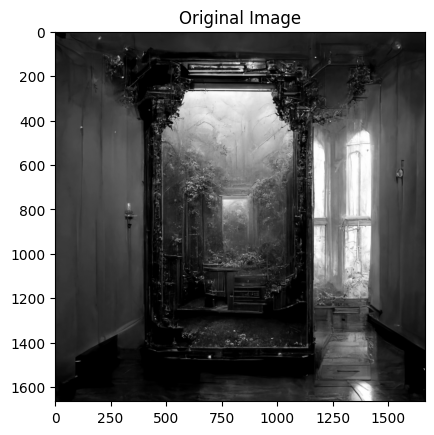

Image shape: (1664, 1664)


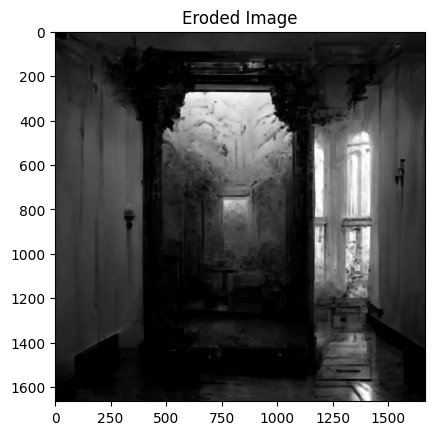

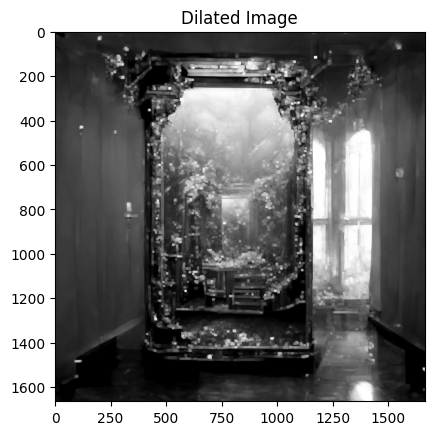

In [ ]:
# 6. Morphological Operations - Erosion and Dilation
# Erosion and dilation are basic morphological transformations that process the image using a kernel.

# Display the original image
plt.figure()
plt.title("Original Image")
plt.imshow(image, cmap="gray")
plt.show()

# Print the image dimensions (optional)
print("Image shape:", image.shape)

# Define a kernel for morphological operations
# Kernel size determines the size of the structural element used for transformations.
kernel = np.ones((5, 5), np.uint8)  # 11x11 kernel of ones

# Perform Erosion
# Erosion removes pixels on object boundaries, effectively shrinking objects in the image.
# The 'iterations' parameter determines how many times erosion is applied.
eroded_image = cv2.erode(image, kernel, iterations=2)

# Display the eroded image
plt.figure()
plt.title("Eroded Image")
plt.imshow(eroded_image, cmap="gray")
plt.show()

# Perform Dilation (Uncomment to use)
# Dilation adds pixels to object boundaries, effectively enlarging objects in the image.
dilated_image = cv2.dilate(image, kernel, iterations=2)

plt.figure()
plt.title("Dilated Image")
plt.imshow(dilated_image, cmap="gray")
plt.show()
